In [1]:
import sys

import so_ml_tools as soml

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, InputLayer
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import clone_model
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

2023-09-20 11:59:40.108436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Set up class labels

In [2]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# Download the Fashion MNIST data set

In [3]:
# Load the dataset from keras directly and print the number of images / labels.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"X_train size: {len(X_train)}, shape {X_train.shape}")
print(f"y_train size: {len(y_train)}, shape {y_train.shape}")
print(f"X_test size: {len(X_test)}, shape {X_test.shape}")
print(f"y_test size: {len(y_test)}, shape {y_test.shape}")

X_train size: 60000, shape (60000, 28, 28)
y_train size: 60000, shape (60000,)
X_test size: 10000, shape (10000, 28, 28)
y_test size: 10000, shape (10000,)


## Inspect the data, what is the shape? do we need to normalize?

In [4]:
# Let's look at some of the data to see if we need to perform some normalization.
X_train[:5], y_train[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,


## Normalize data (0-255 -> 0-1)

In [5]:
# It seems that the color values are ranging from 0 to 255, so we need to normalize the data.
X_train = X_train / 255.
X_test = X_test / 255.

X_train[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Reshape images, need to add the channels to the shape, shape should be (batch, height, width, channels)

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Visualize the images, se we can see what the images look like and if the class labels match the image shown.

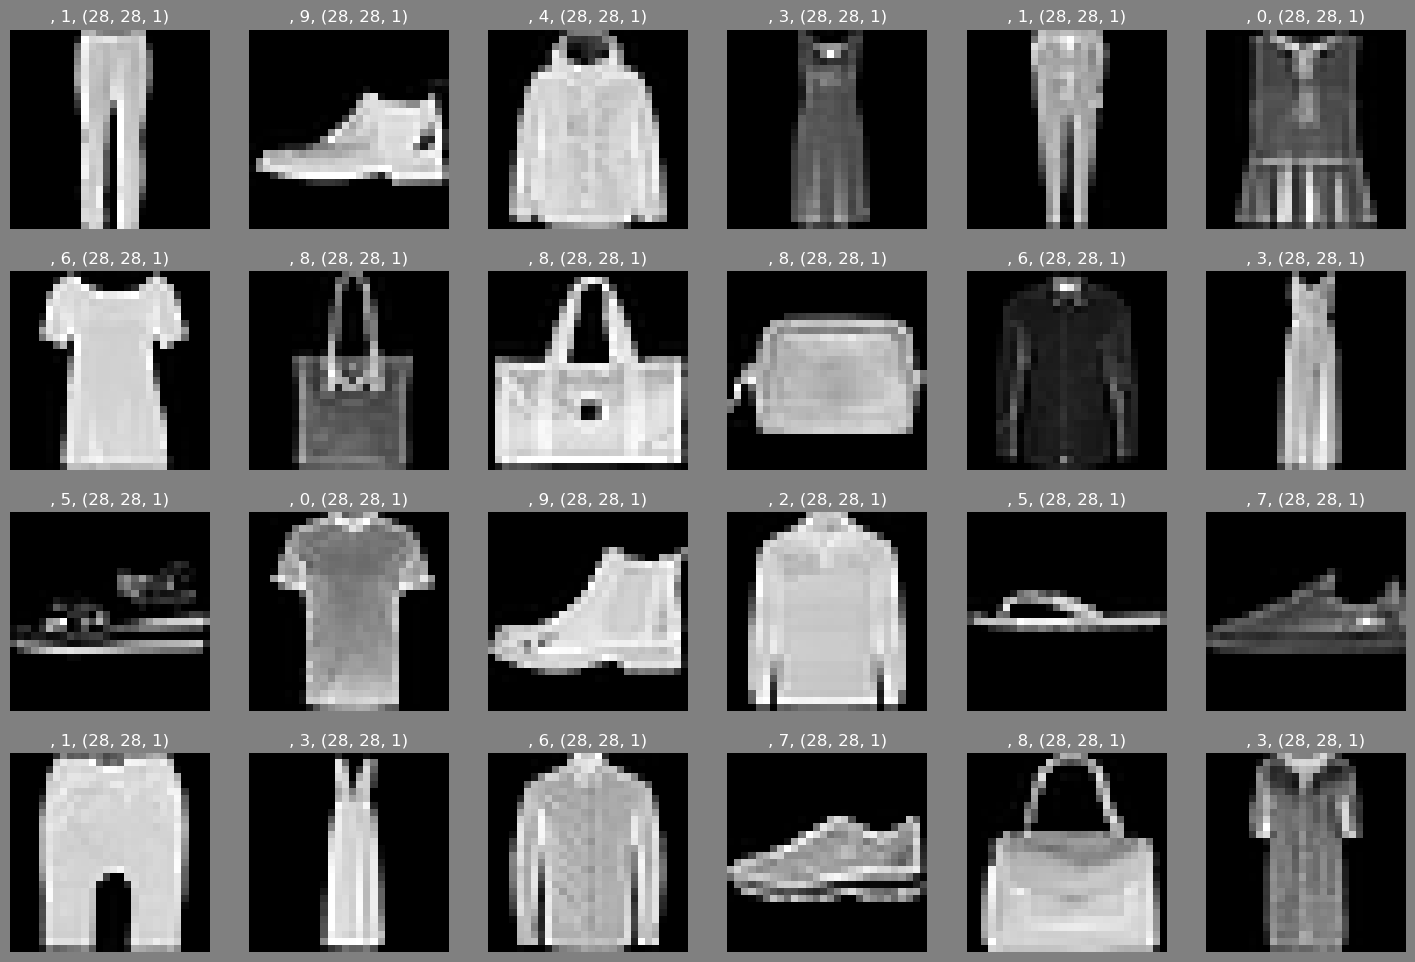

In [7]:
# Visualize a number of images
soml.data.image.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names, shape=(4, 6))

## One-hot encode the labels

In [8]:
# One-hot encode the labels.
y_train = to_categorical(y_train, dtype=int)
y_test = to_categorical(y_test, dtype=int)

# Show first then entries.
y_train[:10], y_test[:10]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]))

## Inspect if the labels still match with the images

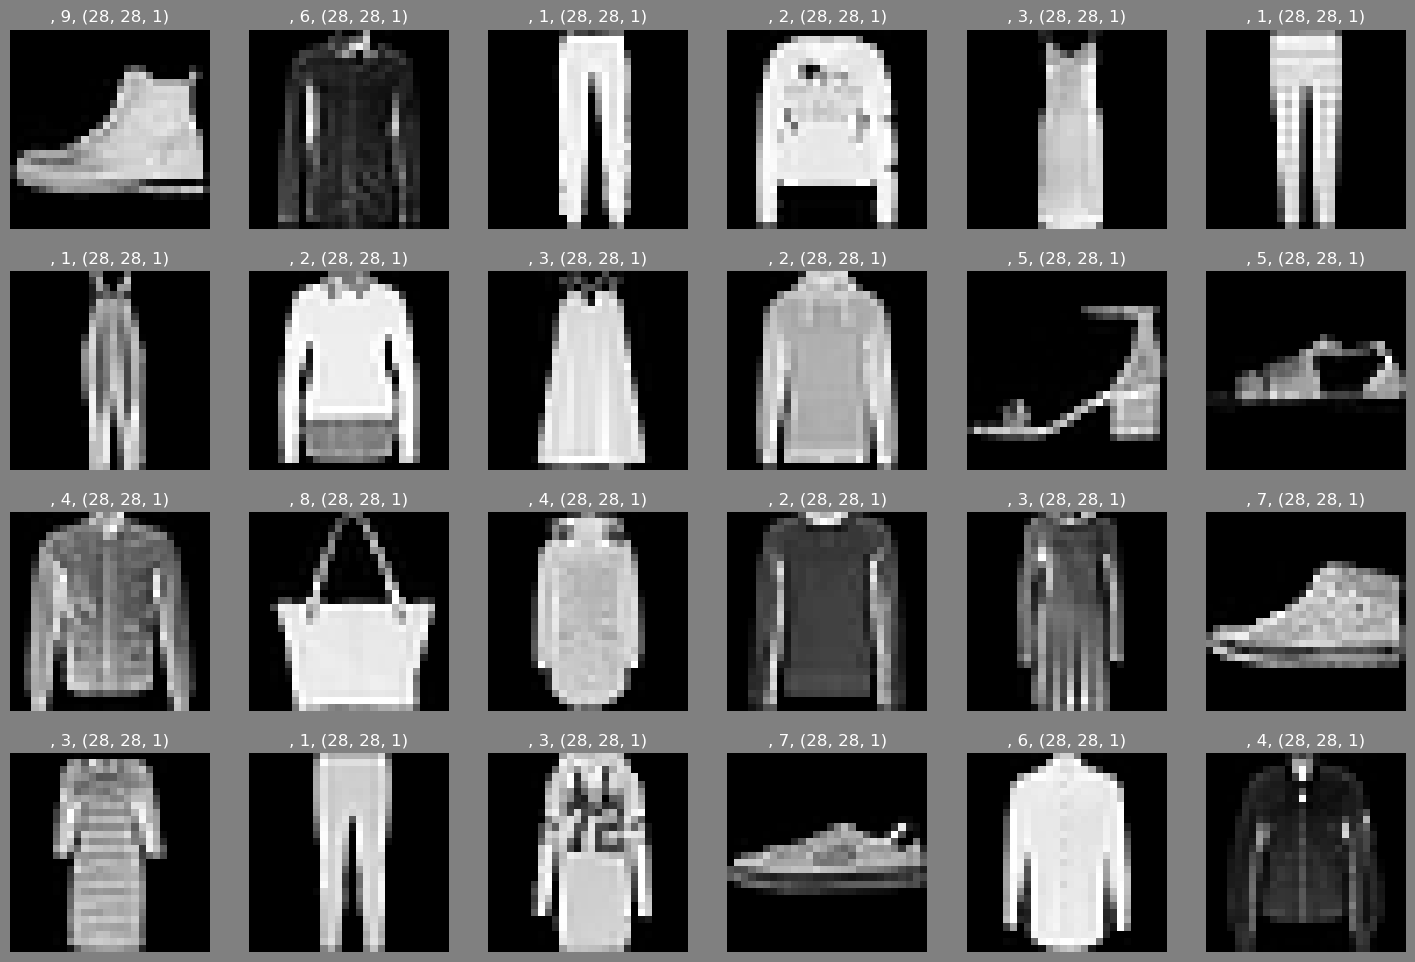

In [9]:
# Let's look at the images again to see if everything is still correct
soml.data.image.show_images_from_nparray_or_tensor(x=X_train, y=y_train, class_names=class_names)

## Create a baseline model from where we can start to improve it

In [10]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(name="Conv2D_1", filters=10, kernel_size=(2, 2), activation="relu", input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(2, 2), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(2, 2), activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.summary()

model_1.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=10,
                        validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 12, 12, 10)        410       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 10)          0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 10)          410       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 10)          0

## Plot the history of model_1, watch out for overfitting and underfitting.

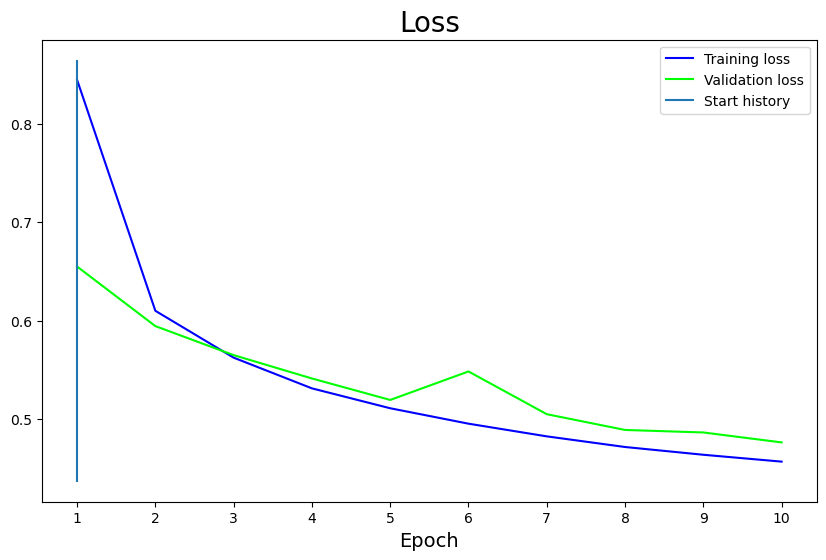

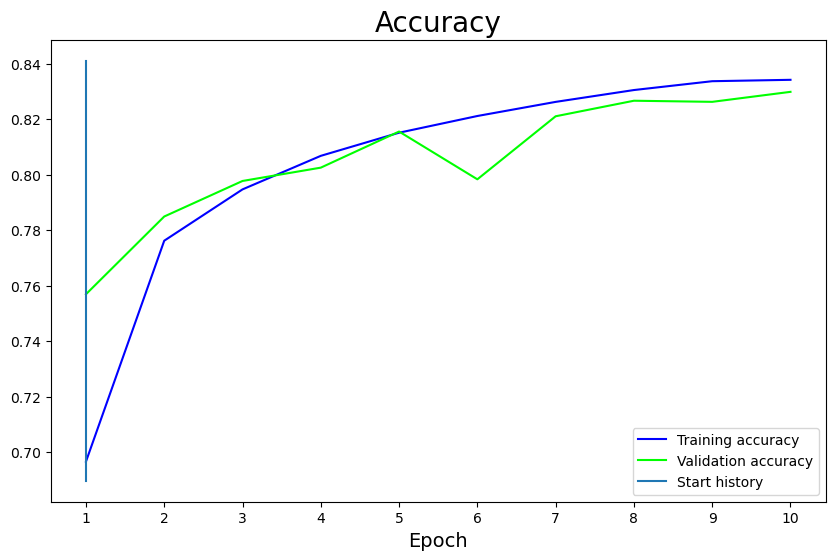

In [11]:
soml.tf.model.plot.plot_history(history=history_1)

## Create a confusion matrix of model_1

313/313 [==============================] - 0s 507us/step


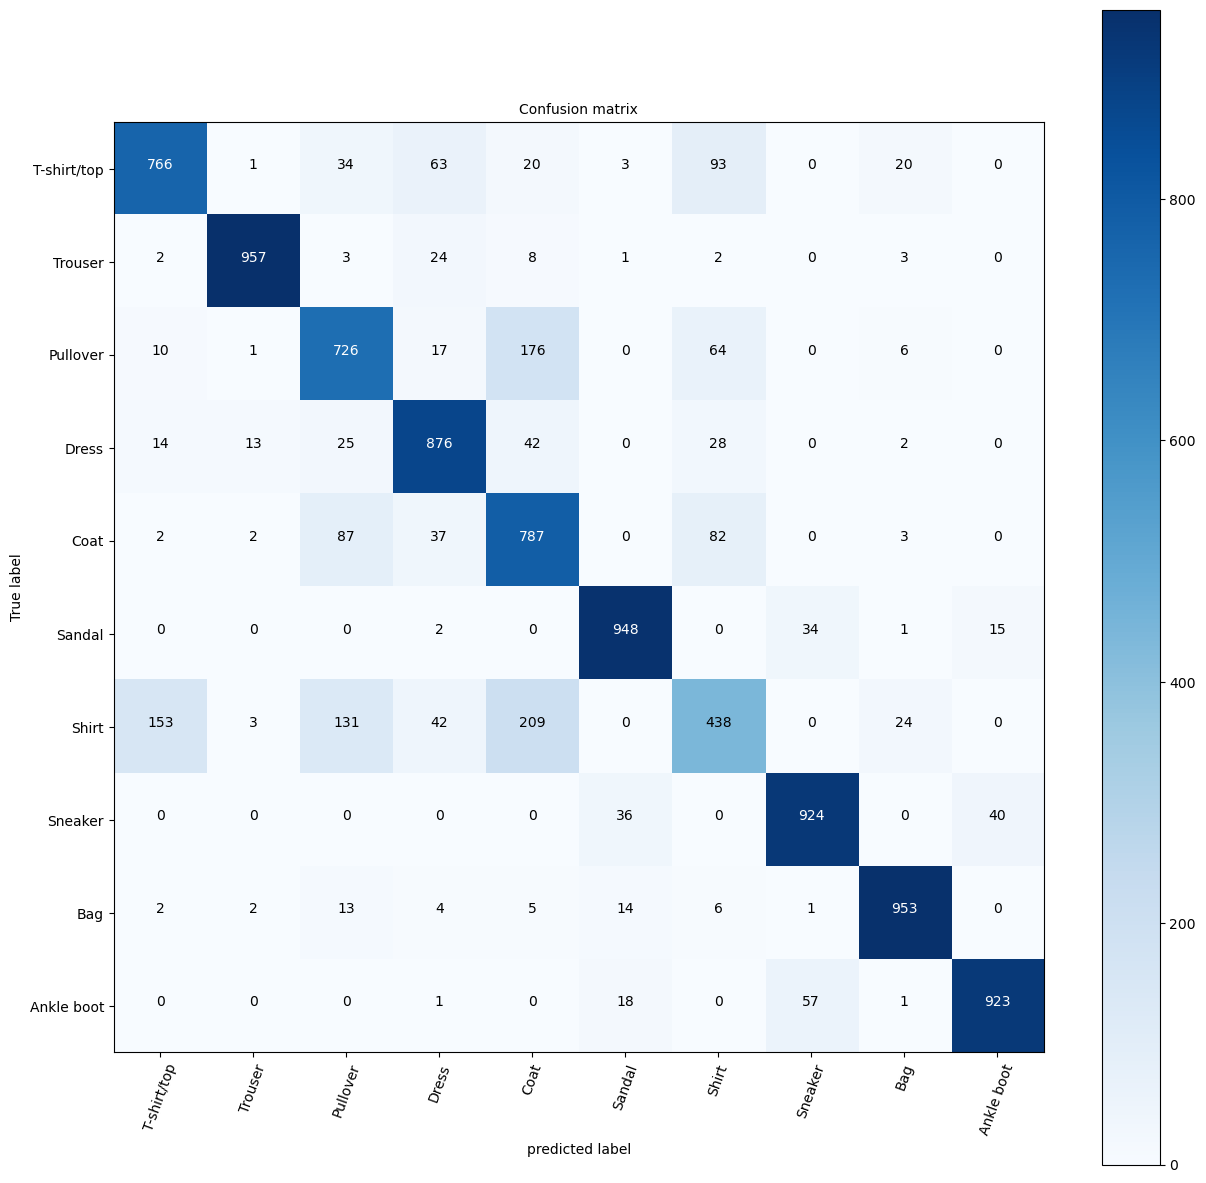

In [13]:
y_prob = model_1.predict(X_test, batch_size=32)

soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob, class_names=class_names, figsize=(15, 15), text_size=10)

## Model_1 was performing quite well, let's make the model a bit more complex.

In [14]:
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(name="Conv2D_1", filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    # MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Conv2D(filters=32, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Conv2D(filters=24, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.15),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(rate=0.15),
    Dense(10, activation="softmax")
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 24)        6936      
                                                      

### Compile and train model_2

In [15]:
model_2.compile(loss=categorical_crossentropy,
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_test, y_test))

Epoch 1/20


2023-09-20 12:01:36.526194: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 3s 2ms/step - loss: 0.5715 - accuracy: 0.7898 - val_loss: 0.3864 - val_accuracy: 0.8578
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3703 - accuracy: 0.8642 - val_loss: 0.3210 - val_accuracy: 0.8818
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3192 - accuracy: 0.8819 - val_loss: 0.2889 - val_accuracy: 0.8918
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2893 - accuracy: 0.8933 - val_loss: 0.2699 - val_accuracy: 0.9005
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2697 - accuracy: 0.9018 - val_loss: 0.2565 - val_accuracy: 0.9051
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2516 - accuracy: 0.9068 - val_loss: 0.2418 - val_accuracy: 0.9126
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2441 - accuracy: 0.9083 - val_loss: 0.2410 - val_accuracy: 0.9117
Epoch 8/20
938/93

## Display the loss and validation history for Model_2

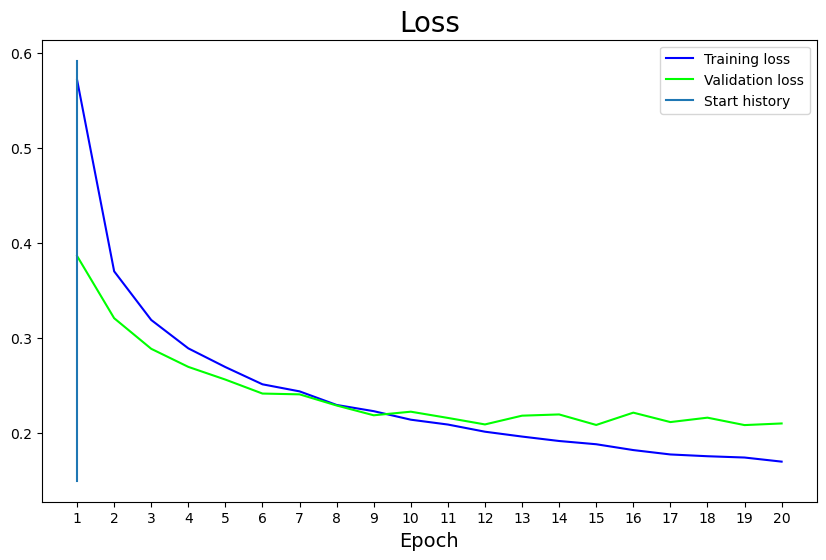

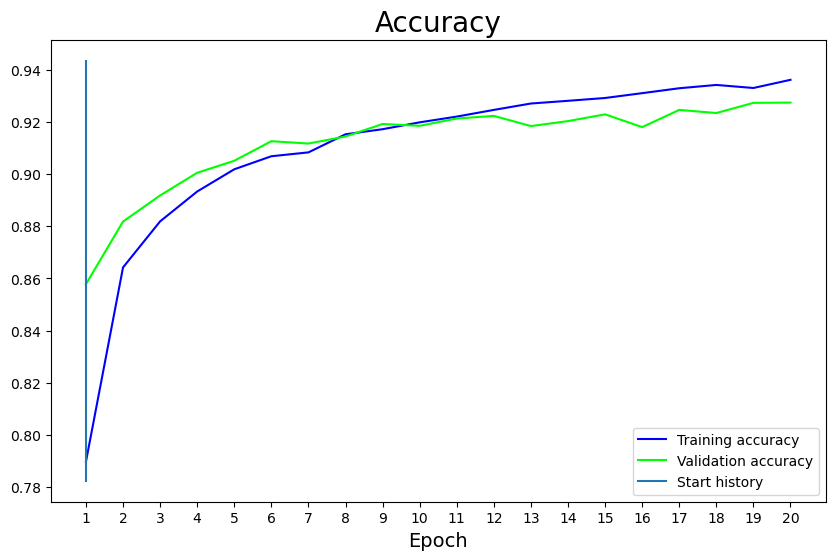

In [16]:
soml.tf.model.plot.plot_history(history=history_2)

## Create a confusion-matrix for Model_2

313/313 [==============================] - 0s 541us/step


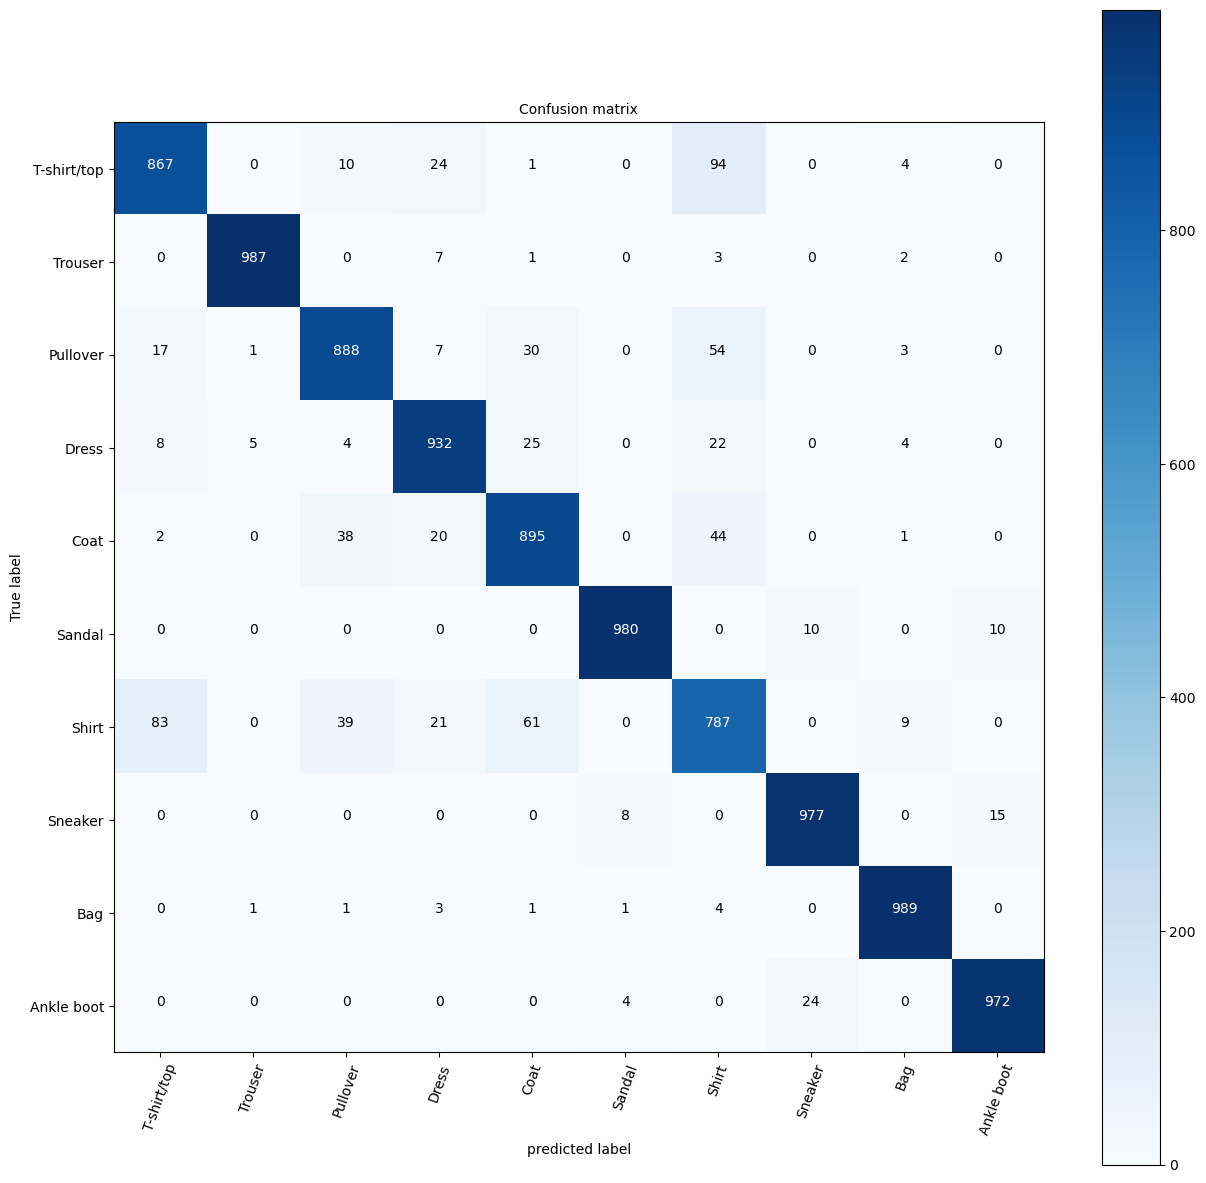

In [18]:
y_prob = model_2.predict(X_test, batch_size=32)

soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob, class_names=class_names, figsize=(15, 15), text_size=10)

## Add data augmentation to see if this improves the results

In [23]:
datagen_train = ImageDataGenerator(
        height_shift_range=0.2,
        width_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')
datagen_train.fit(X_train)

datagen_test = ImageDataGenerator(
        height_shift_range=0.2,
        width_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='constant')
datagen_test.fit(X_test)

In [24]:
batch_size=64

train_data = datagen_train.flow(X_train, y_train, batch_size=batch_size, shuffle=True, seed=42)
test_data = datagen_test.flow(X_test, y_test, batch_size=batch_size, shuffle=True, seed=42)

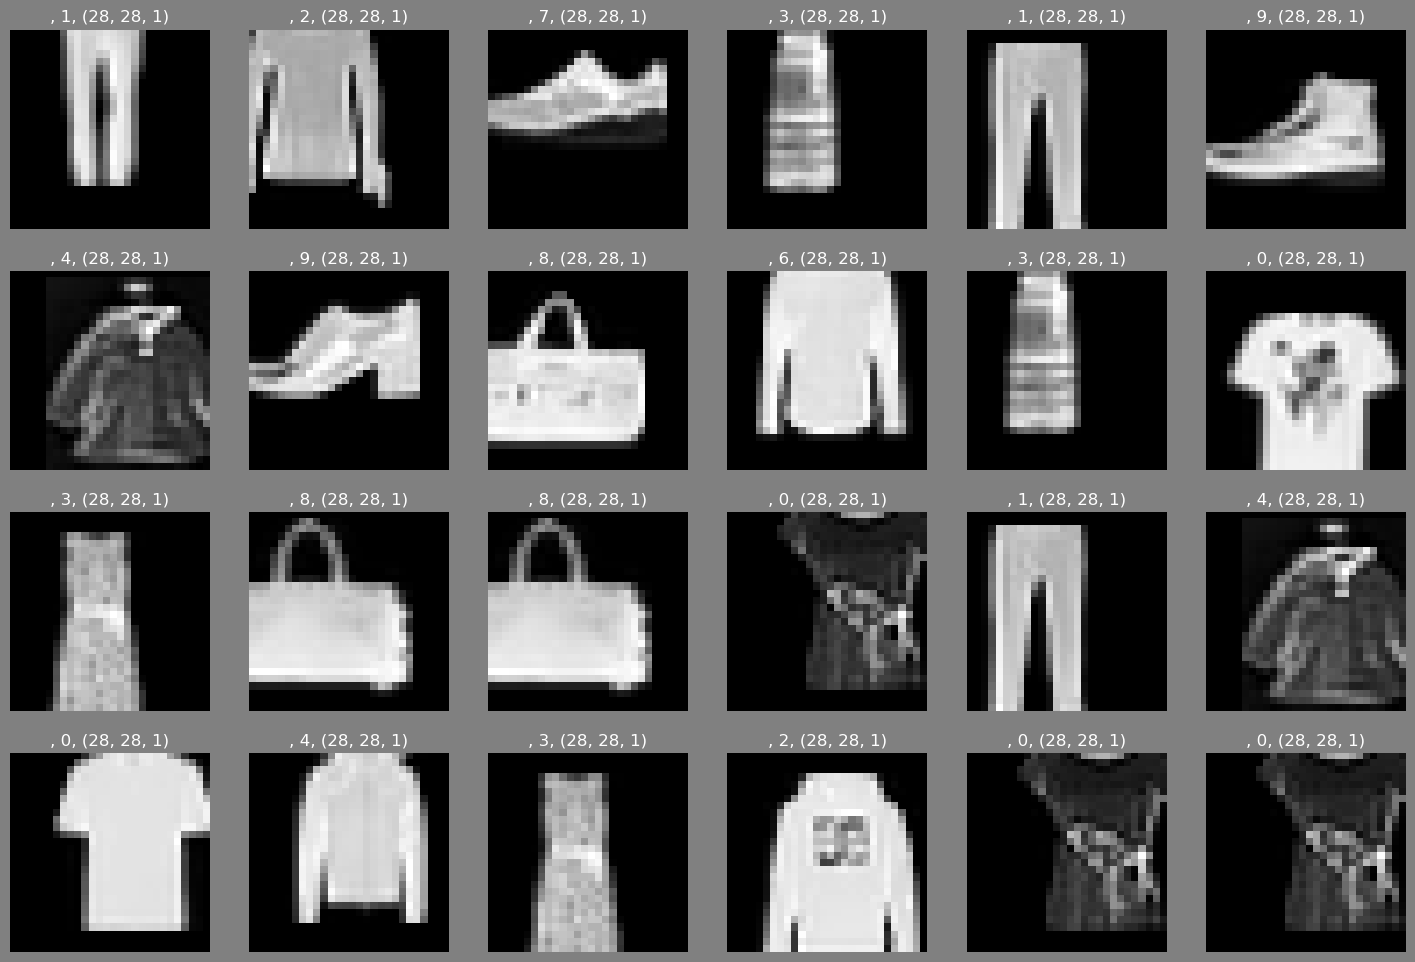

In [25]:
images, labels = train_data.next()
soml.data.image.show_images_from_nparray_or_tensor(x=images, y=labels, class_names=class_names)

### Create model_3 to use the data augmentation

In [22]:
tf.random.set_seed(42)

model_3 = clone_model(model_2)

model_3.compile(loss=categorical_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        batch_size=batch_size,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/50


2023-09-20 12:02:53.345088: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 6s 6ms/step - loss: 0.9574 - accuracy: 0.6466 - val_loss: 0.6719 - val_accuracy: 0.7505
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.6679 - accuracy: 0.7477 - val_loss: 0.5610 - val_accuracy: 0.7913
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.5865 - accuracy: 0.7776 - val_loss: 0.5580 - val_accuracy: 0.7925
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.5328 - accuracy: 0.8015 - val_loss: 0.5022 - val_accuracy: 0.8117
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.4975 - accuracy: 0.8159 - val_loss: 0.4397 - val_accuracy: 0.8343
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.4775 - accuracy: 0.8229 - val_loss: 0.4083 - val_accuracy: 0.8479
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.4575 - accuracy: 0.8298 - val_loss: 0.4061 - val_accuracy: 0.8485
Epoch 8/50
938/93

## Display the loss and validation history for Model_3

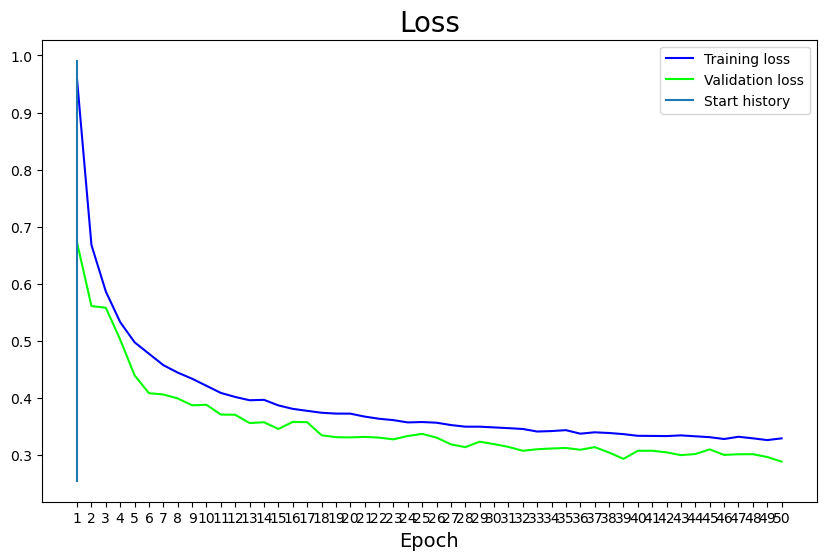

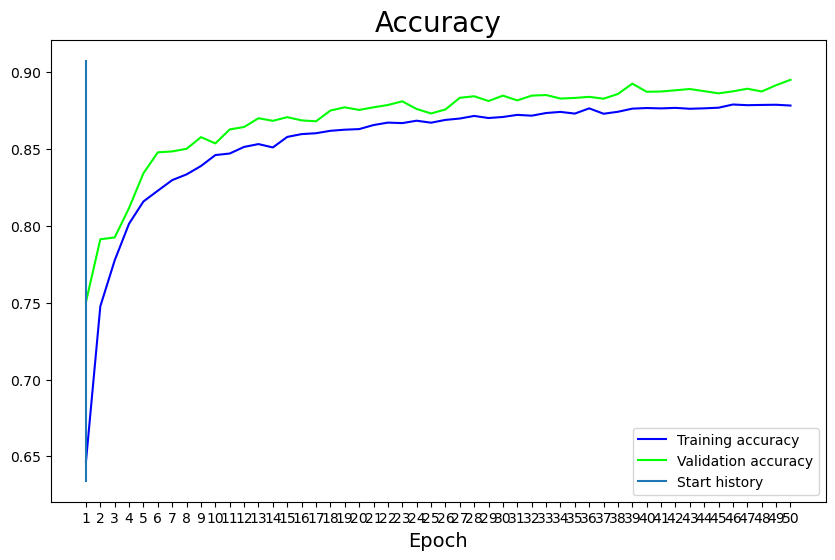

In [26]:
soml.tf.model.plot.plot_history(history=history_3)

### Create a more complex model_4 and let's tune it to see if we can improve results.

In [27]:
tf.random.set_seed(42)

model_4 = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(filters=48, kernel_size=3, activation="relu", padding="same"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=48, kernel_size=3, activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(128, activation="relu"), # 256
    Dropout(rate=0.25),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 48)        480       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 48)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 48)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 48)        20784     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 48)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 48)         

### Compile and fit the model_4

In [28]:
batch_size = 64

model_4.compile(loss=categorical_crossentropy,
                optimizer=Adam(learning_rate=0.002),
                metrics=["accuracy"])

history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test))

Epoch 1/50


2023-09-20 12:13:34.480131: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 3s 2ms/step - loss: 0.5201 - accuracy: 0.8083 - val_loss: 0.3468 - val_accuracy: 0.8718
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8725 - val_loss: 0.3204 - val_accuracy: 0.8815
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3099 - accuracy: 0.8869 - val_loss: 0.2921 - val_accuracy: 0.8859
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2887 - accuracy: 0.8931 - val_loss: 0.2535 - val_accuracy: 0.9071
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2739 - accuracy: 0.8994 - val_loss: 0.2539 - val_accuracy: 0.9079
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2597 - accuracy: 0.9035 - val_loss: 0.2502 - val_accuracy: 0.9084
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2490 - accuracy: 0.9086 - val_loss: 0.2456 - val_accuracy: 0.9109
Epoch 8/50
938/93

### Plot fit history of model_4

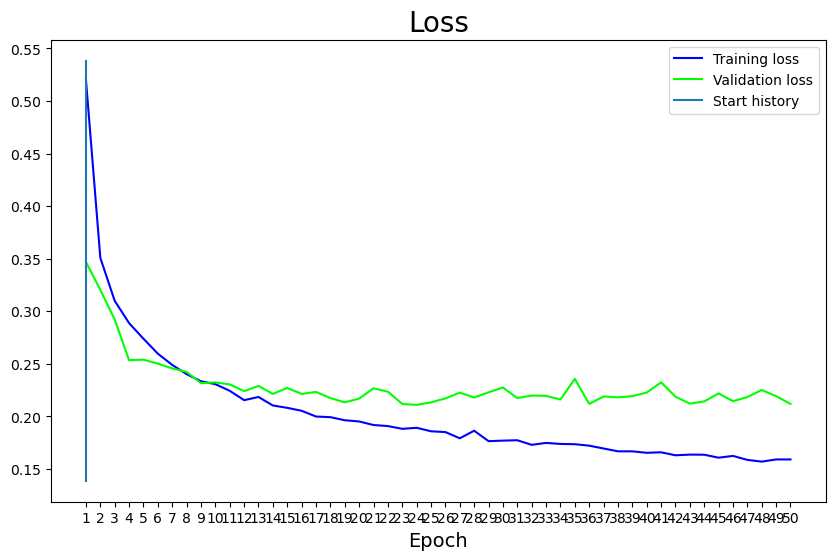

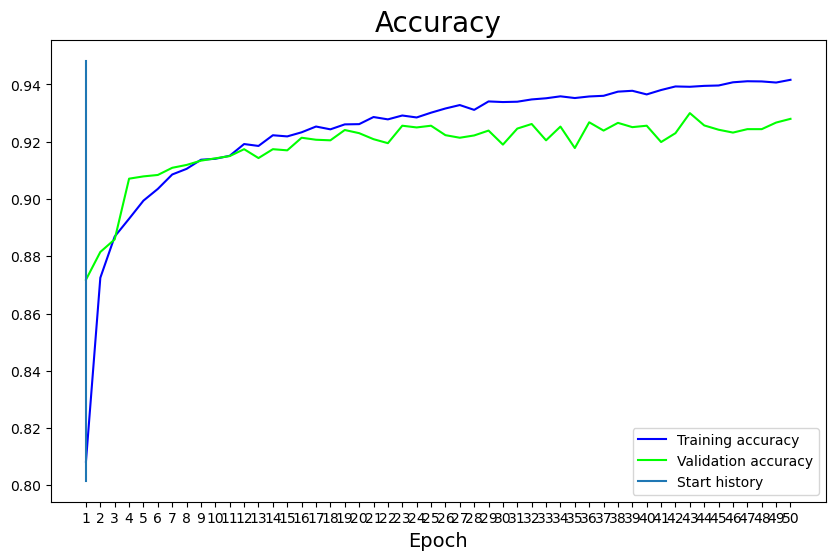

In [29]:
soml.tf.model.plot.plot_history(history=history_4)

### Create confusion matrix for model_4

313/313 [==============================] - 0s 478us/step


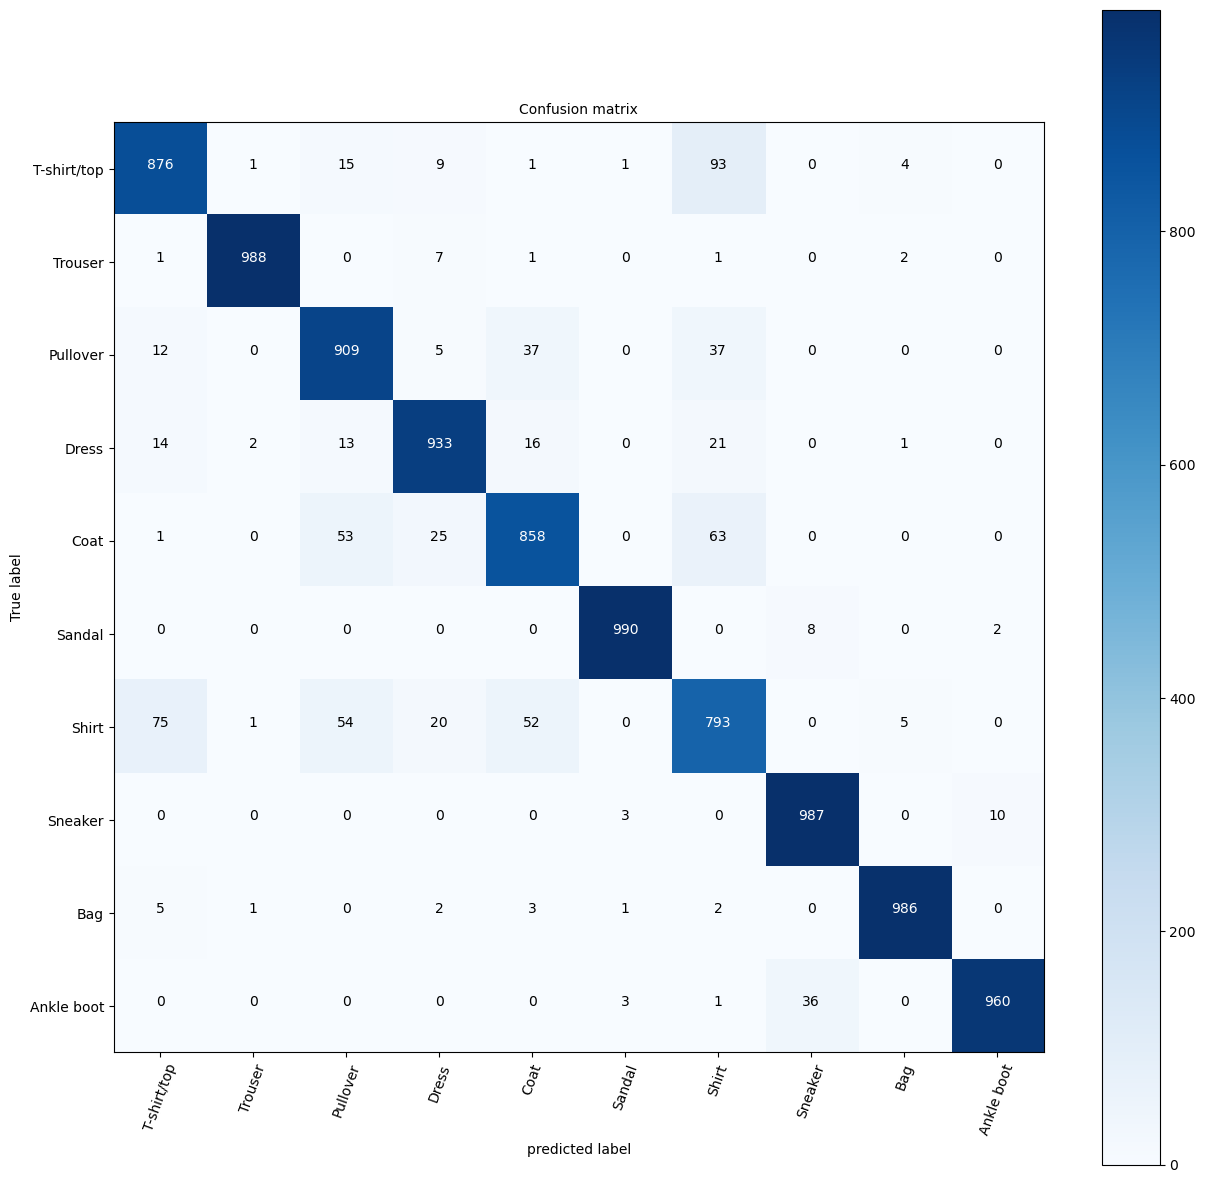

In [32]:
y_prob = model_4.predict(X_test, batch_size=32)
soml.evaluate.plot.confusion_matrix(y_true=y_test, y_prob=y_prob, class_names=class_names, figsize=(15, 15), text_size=10)

## Try different batch sizes

Epoch 1/50


2023-09-20 12:30:23.627607: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


3750/3750 [==============================] - 7s 2ms/step - loss: 0.4865 - accuracy: 0.8220 - val_loss: 0.3270 - val_accuracy: 0.8800
Epoch 2/50
3750/3750 [==============================] - 6s 1ms/step - loss: 0.3558 - accuracy: 0.8698 - val_loss: 0.3434 - val_accuracy: 0.8752
Epoch 3/50
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3259 - accuracy: 0.8819 - val_loss: 0.2928 - val_accuracy: 0.8944
Epoch 4/50
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3068 - accuracy: 0.8873 - val_loss: 0.2830 - val_accuracy: 0.8992
Epoch 5/50
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3004 - accuracy: 0.8906 - val_loss: 0.3046 - val_accuracy: 0.8925
Epoch 6/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2905 - accuracy: 0.8921 - val_loss: 0.2742 - val_accuracy: 0.9001
Epoch 7/50
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2834 - accuracy: 0.8955 - val_loss: 0.2765 - val_accuracy: 0.8985
Epo

2023-09-20 12:35:23.203090: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4944 - accuracy: 0.8186 - val_loss: 0.3298 - val_accuracy: 0.8793
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3471 - accuracy: 0.8732 - val_loss: 0.3089 - val_accuracy: 0.8845
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.8829 - val_loss: 0.2857 - val_accuracy: 0.8905
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8912 - val_loss: 0.2862 - val_accuracy: 0.8947
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8949 - val_loss: 0.2791 - val_accuracy: 0.8934
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.8992 - val_loss: 0.2503 - val_accuracy: 0.9075
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2610 - accuracy: 0.9028 - val_loss: 0.2568 - val_accuracy: 0.9055
Epo

2023-09-20 12:37:59.178828: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 3s 2ms/step - loss: 0.5084 - accuracy: 0.8123 - val_loss: 0.3351 - val_accuracy: 0.8796
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3465 - accuracy: 0.8734 - val_loss: 0.3251 - val_accuracy: 0.8769
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8852 - val_loss: 0.2806 - val_accuracy: 0.8963
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2852 - accuracy: 0.8953 - val_loss: 0.2529 - val_accuracy: 0.9070
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2697 - accuracy: 0.9005 - val_loss: 0.2590 - val_accuracy: 0.9043
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2587 - accuracy: 0.9034 - val_loss: 0.2470 - val_accuracy: 0.9079
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2501 - accuracy: 0.9066 - val_loss: 0.2435 - val_accuracy: 0.9131
Epoch 8/50
938/93

2023-09-20 12:39:27.032582: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7961 - val_loss: 0.3653 - val_accuracy: 0.8663
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8686 - val_loss: 0.3064 - val_accuracy: 0.8864
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8835 - val_loss: 0.2695 - val_accuracy: 0.8987
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8936 - val_loss: 0.2617 - val_accuracy: 0.9045
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.8987 - val_loss: 0.2657 - val_accuracy: 0.9008
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9042 - val_loss: 0.2508 - val_accuracy: 0.9058
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9083 - val_loss: 0.2511 - val_accuracy: 0.9074
Epoch 8/50
469/46

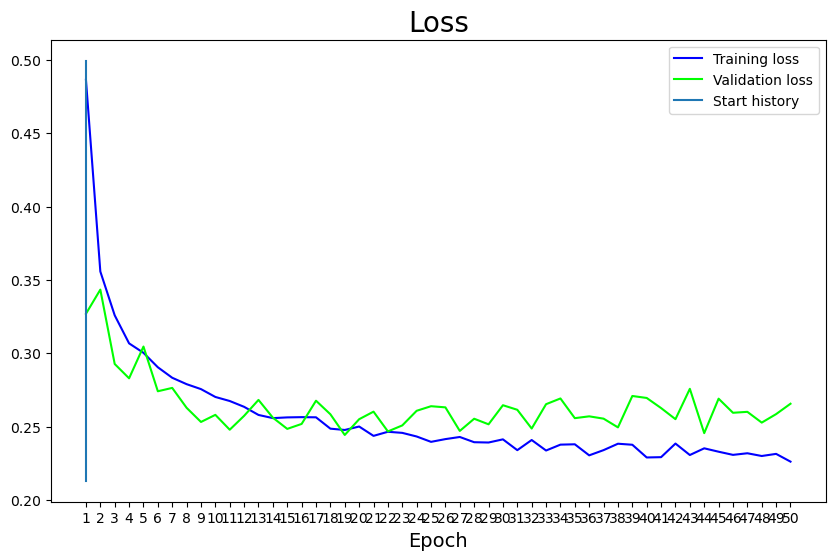

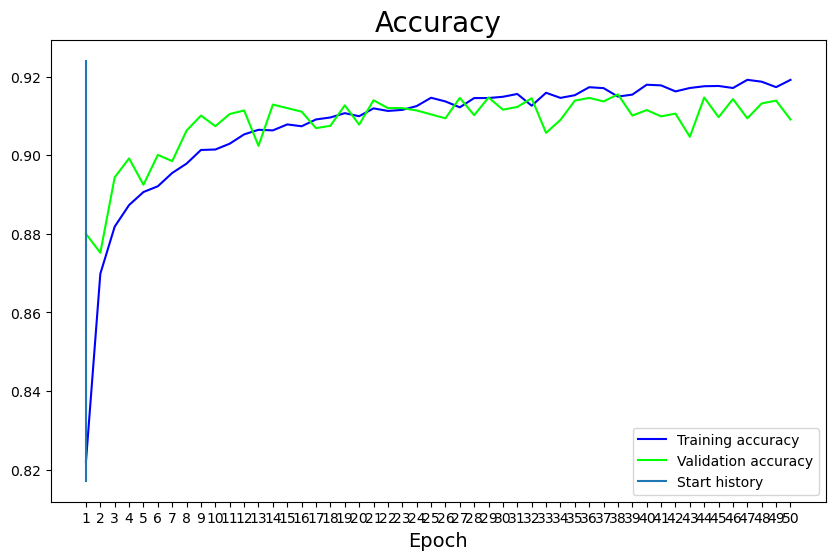

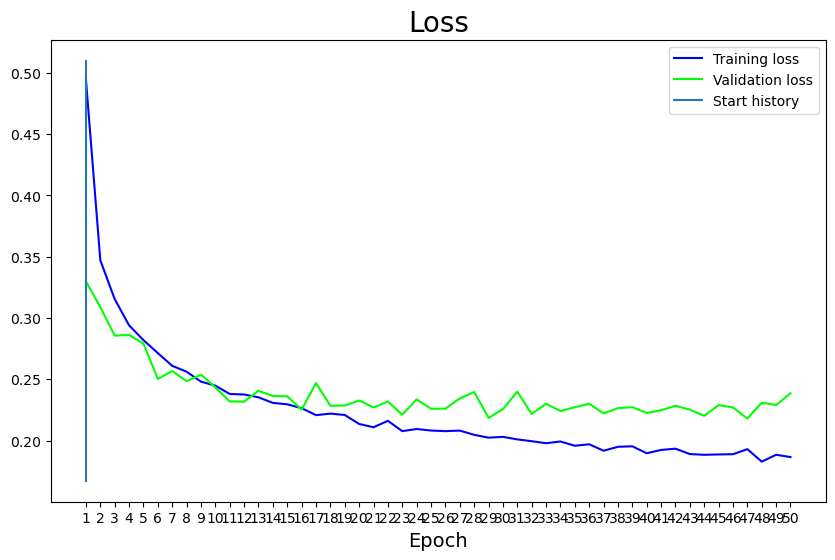

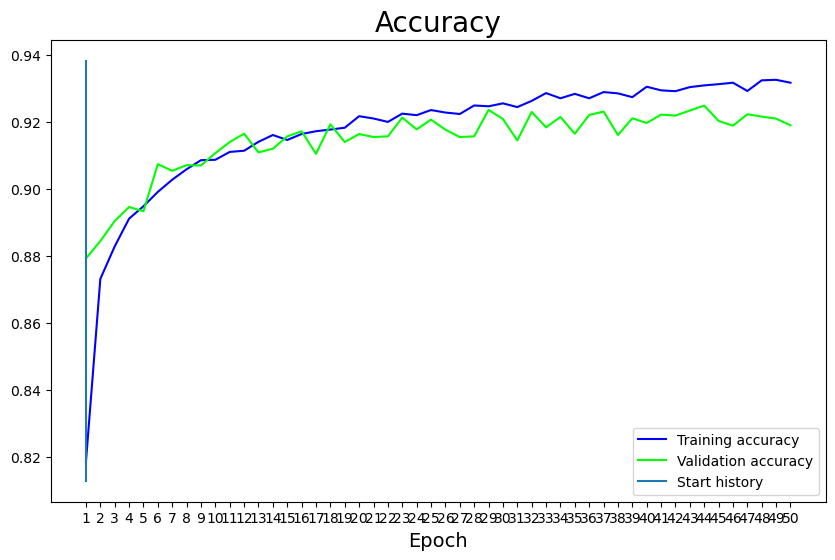

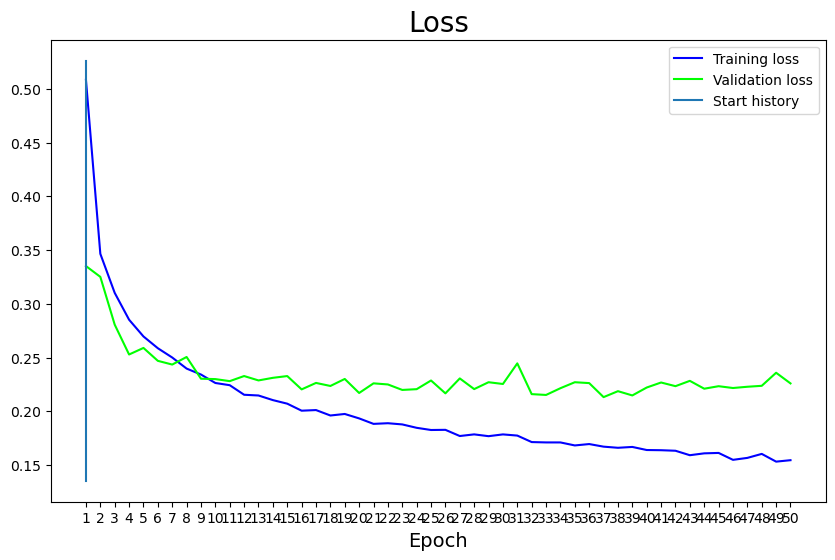

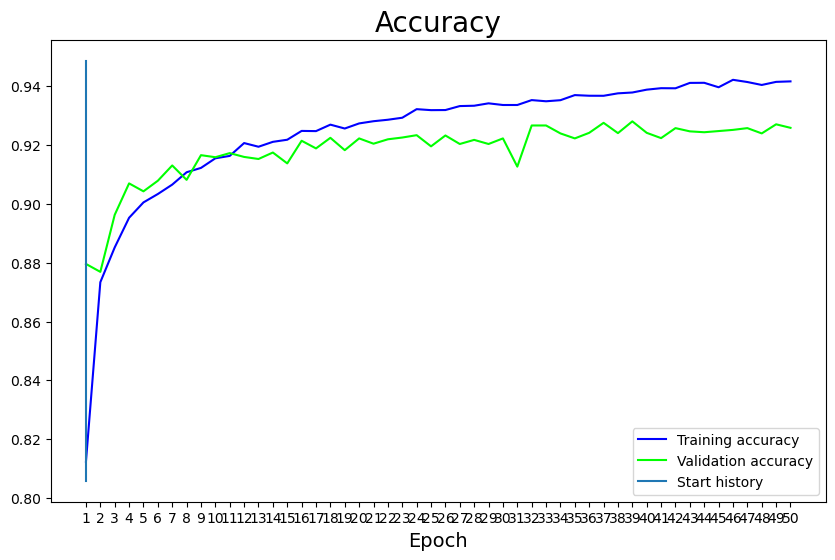

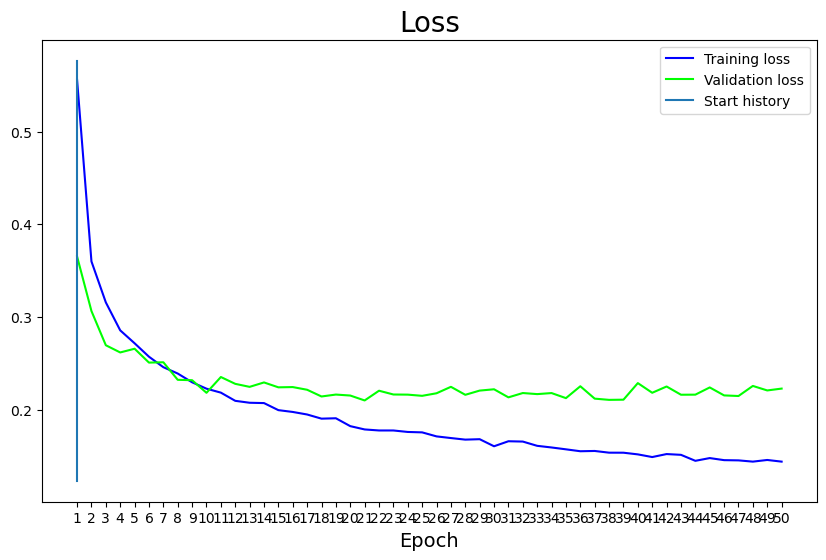

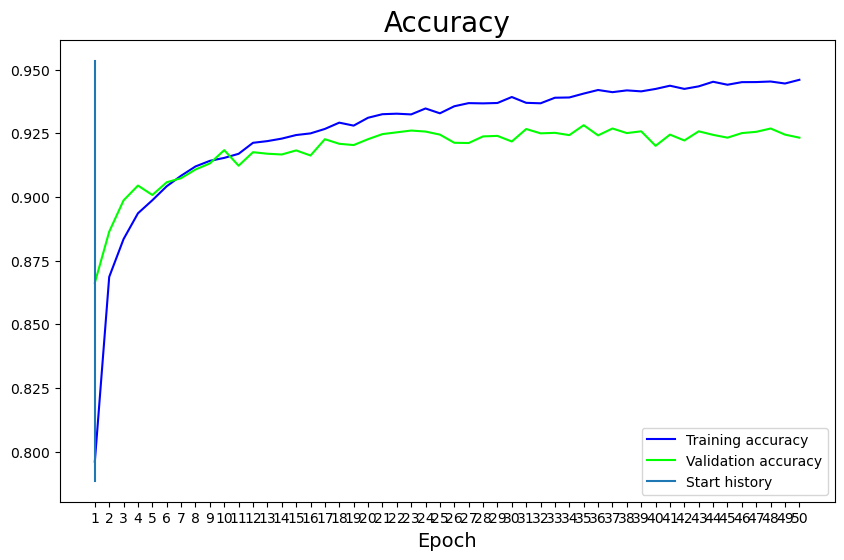

In [33]:
all_history = []
batch_sizes = [16, 32, 64, 128]

for idx, batch_size in enumerate(batch_sizes):
    model_5 = clone_model(model_4)

    model_5.compile(loss=categorical_crossentropy,
                 optimizer=Adam(learning_rate=0.002),
                 metrics=["accuracy"])

    all_history.append(model_5.fit(X_train,
                        y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_data=(X_test, y_test)))

for history in all_history:
    soml.tf.model.plot.plot_history(history=history)